1


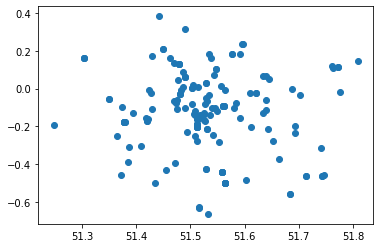

In [3]:
import process_json as pj

filename = "/home/lanpokn/Documents/2021/python_data_analysis_base/final_work/201206_tweets/activities_201206100000_201206100010.json"
json_processor = pj.process_json()
papers = []
papers = json_processor.read_single_file(filename,papers=papers)
json_processor.draw_geo(papers)
print("1")